In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [245]:
comp=pd.read_excel(r'compactiv.xlsx')

In [246]:
comp

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
0         1       0   2147     79      68   0.2  0.20   40671.0  53995.0   
1         0       0    170     18      21   0.2  0.20     448.0   8385.0   
2        15       3   2162    159     119   2.0  2.40       NaN  31950.0   
3         0       0    160     12      16   0.2  0.20       NaN   8670.0   
4         5       1    330     39      38   0.4  0.40       NaN  12185.0   
...     ...     ...    ...    ...     ...   ...   ...       ...      ...   
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz  \
0      0.00  ...    0.00   0.0   1.60   2.60   16.00   26.40      CPU_Bound   
1      0.00  ...    0.00   0.0   0.00   0.00   15.63   16.83  Not_CPU_Bound   
2      0.00  ...    0.00   1.2   6.00   9.40  150.20  220.20  Not_CPU_Bound   
3      0.00  ...    0.00   0.0   0.20   0.20   15.60   16.80  Not_CPU_Bound   
4      0.00  ...    0.00   0.0   1.00   1.20   37.80   47.60  Not_CPU_Bound   
...     ...  ...     ...   ...    ...    ...     ...     ...            ...   
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      CPU_Bound   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60  Not_CPU_Bound   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80  Not_CPU_Bound   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      CPU_Bound   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      CPU_Bound   

      freemem freeswap  usr  
0        4670  1730946   95  
1        7278  1869002   97  
2         702  1021237   87  
3        7248  1863704   98  
4         633  1760253   90  
...       ...      ...  ...  
8187      387   986647   80  
8188      263  1055742   90  
8189      400   969106   87  
8190      141  1022458   83  
8191      659  1756514   94  

[8192 rows x 22 columns]

In [247]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [248]:
comp.dtypes.value_counts()

float64    13
int64       8
object      1
dtype: int64

In [249]:
comp.describe().T

count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

In [250]:
cols=comp.select_dtypes(include=['int64', 'float']).columns

In [251]:
len(cols)

21

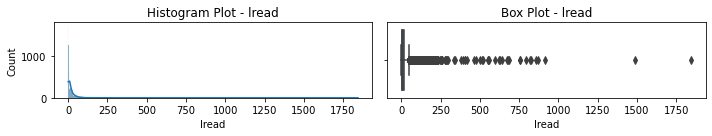

In [252]:
fig, axes = plt.subplots(1, 2, figsize=(10, 2))

# Create the histogram for the 'lread' column
sns.histplot(comp, x='lread', kde=True, ax=axes[0])
axes[0].set_title('Histogram Plot - lread')

# Create the box plot for the 'lread' column
sns.boxplot(x='lread', data=comp, ax=axes[1])
axes[1].set_title('Box Plot - lread')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

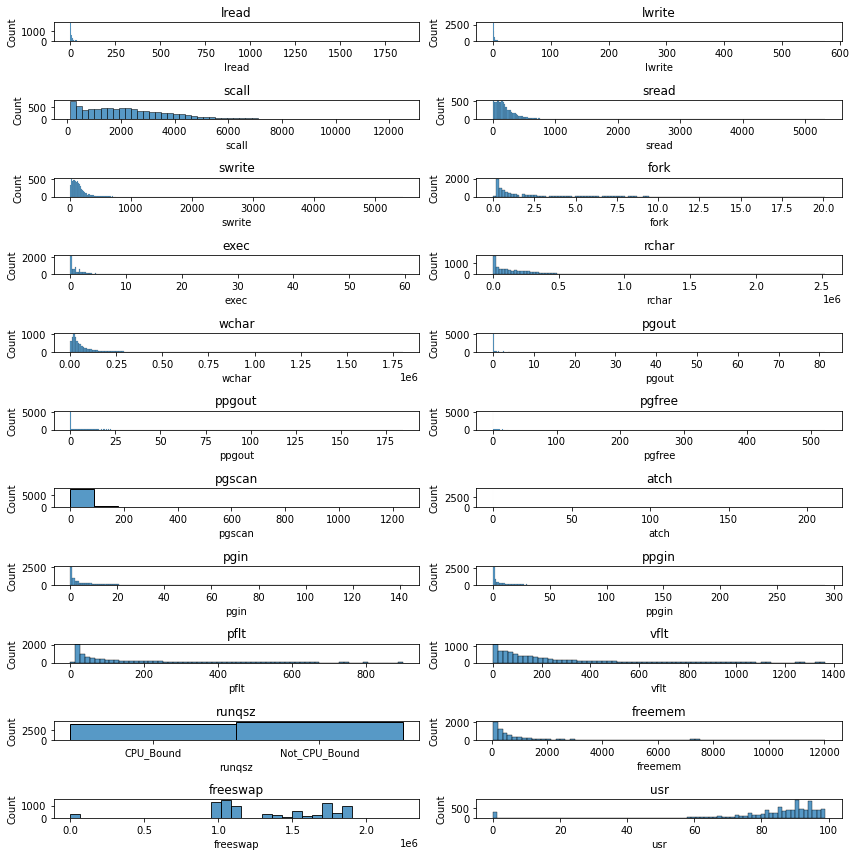

In [253]:
data_plot=comp
fig = plt.figure(figsize=(12, 12))
for i, column in enumerate(data_plot.columns):
    ax = fig.add_subplot(11, 2, i+1)
    sns.histplot(data_plot[column], ax=ax)
    ax.set_title(column)
plt.tight_layout()
plt.show()

C:\Users\aprad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aprad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aprad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aprad\anaconda3\lib\si

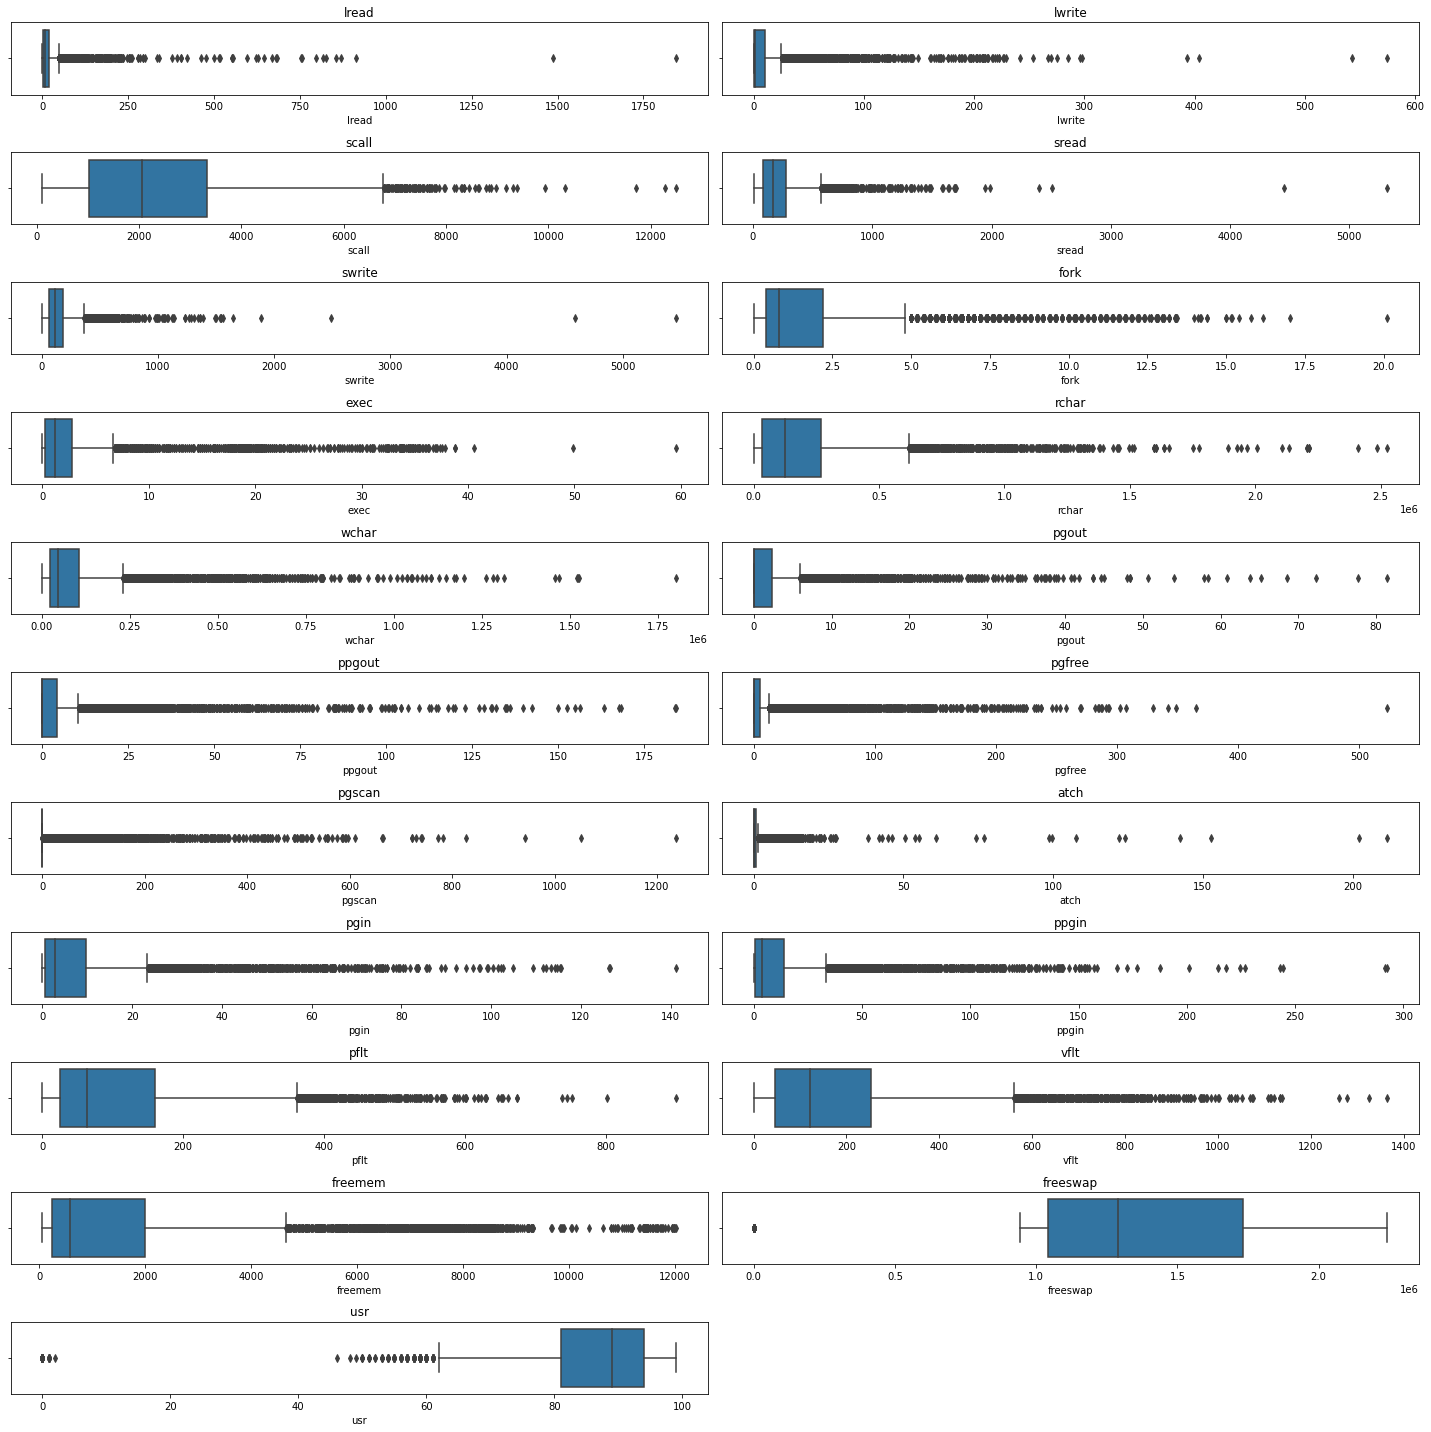

In [254]:
data_plot = comp
numeric_columns = data_plot.select_dtypes(include=['int64', 'float64']).columns

num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2
num_cols = min(num_columns, 2)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20,20))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numeric_columns):
    ax = axes[i // 2, i % 2] if num_rows > 1 else axes[i % 2]
    sns.boxplot(data_plot[column], ax=ax)
    ax.set_title(column)
for i in range(num_columns, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [255]:
comp['runqsz'].value_counts()

Not_CPU_Bound    4331
CPU_Bound        3861
Name: runqsz, dtype: int64

<AxesSubplot:xlabel='runqsz', ylabel='count'>

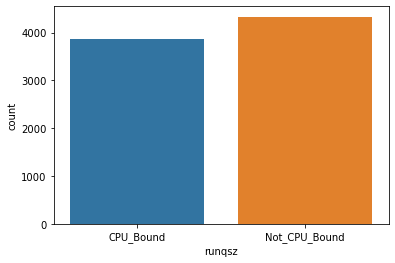

In [256]:
sns.countplot(x='runqsz',data=comp,label='Count')

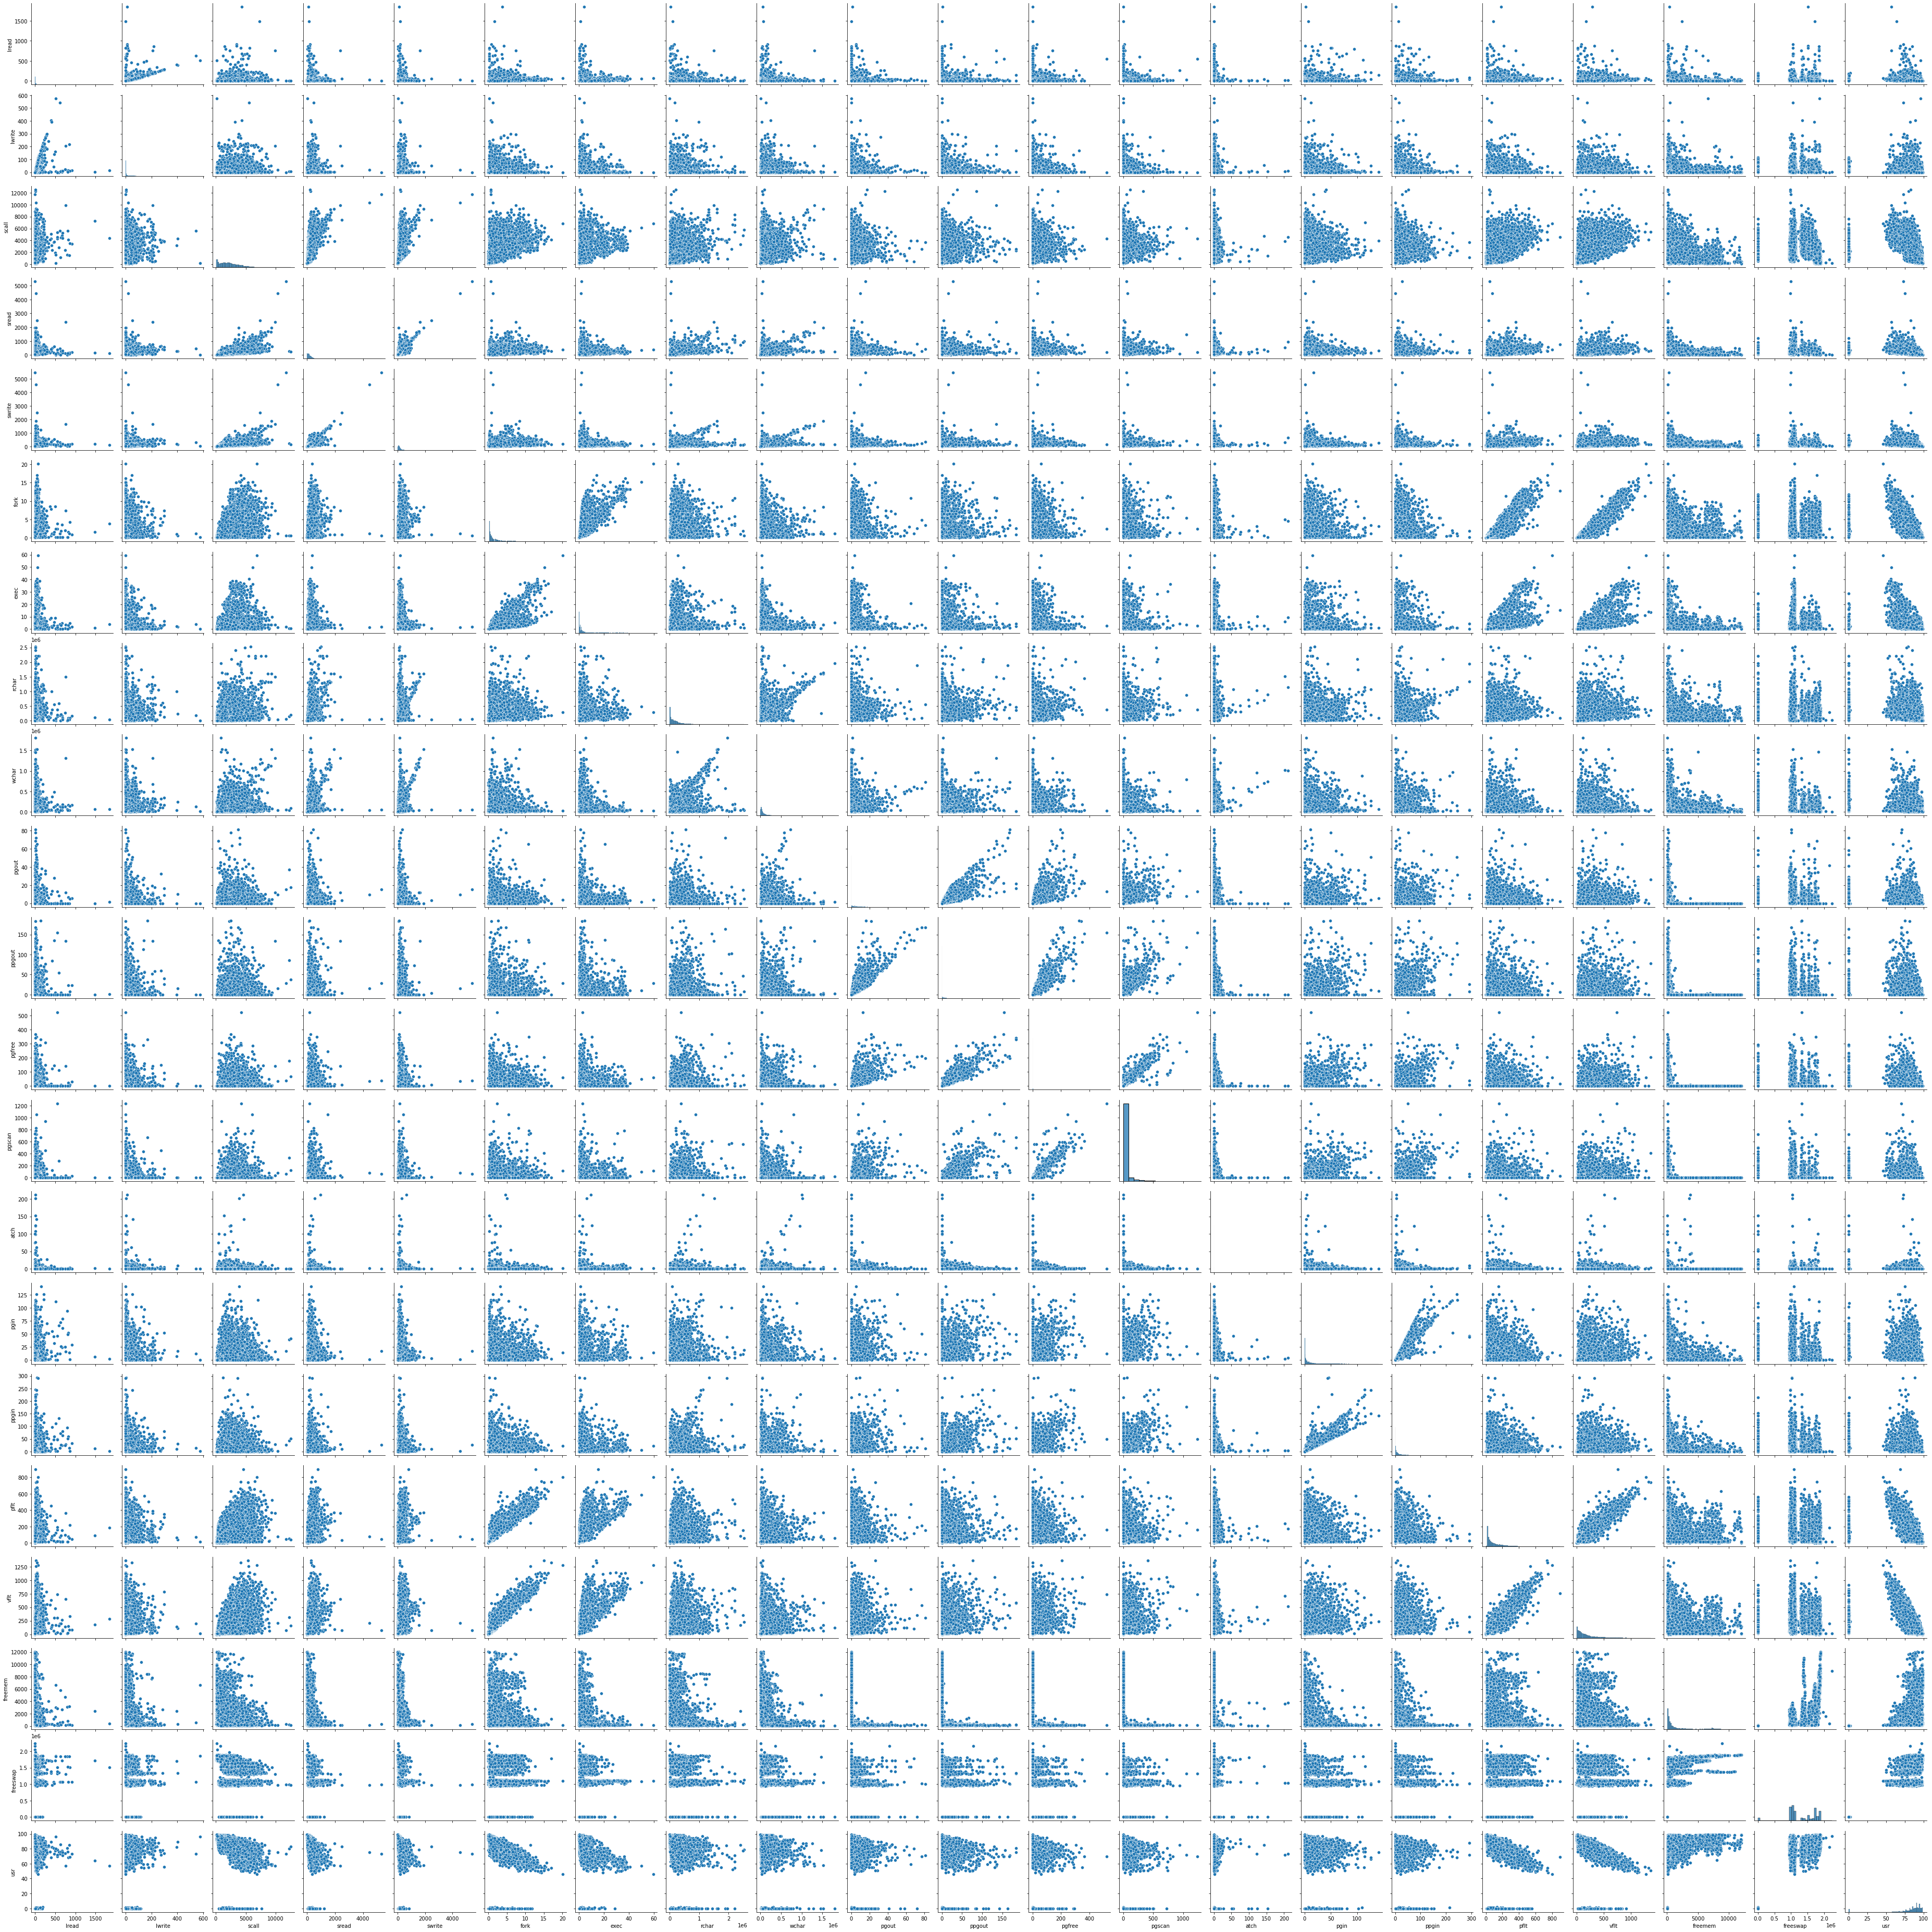

In [257]:
sns.pairplot(comp)

<AxesSubplot:>

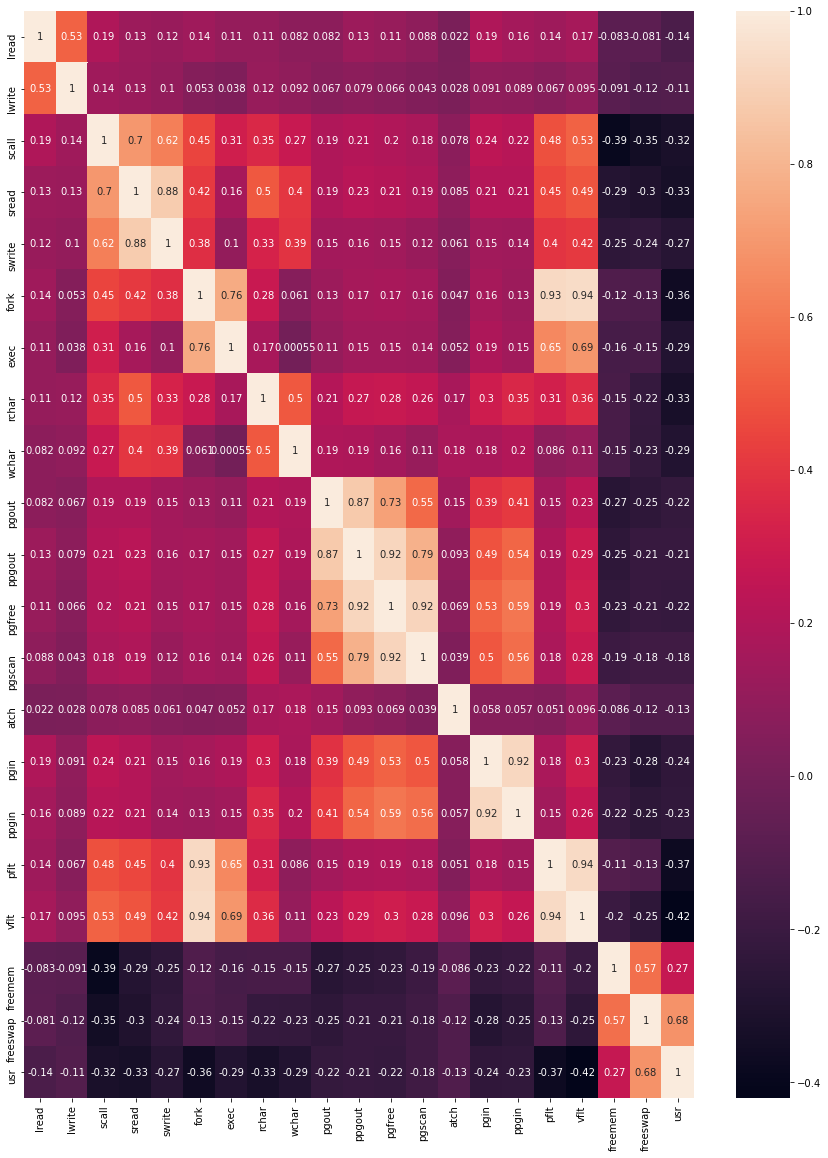

In [258]:
plt.figure(figsize=(15,20))
sns.heatmap(comp.corr(),annot=True)

In [259]:
comp.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [260]:
comp.duplicated().sum()

0

In [261]:
comp['rchar']=comp['rchar'].fillna(comp['rchar'].mean())
comp['wchar']=comp['wchar'].fillna(comp['wchar'].mean())

In [262]:
comp.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [263]:
comp.eq(0).sum()

lread        675
lwrite      2684
scall          0
sread          0
swrite         0
fork          21
exec          21
rchar          0
wchar          0
pgout       4878
ppgout      4878
pgfree      4869
pgscan      6448
atch        4575
pgin        1220
ppgin       1220
pflt           3
vflt           0
runqsz         0
freemem        0
freeswap       0
usr          283
dtype: int64

In [264]:
comp.value_counts().sum()

8192

In [265]:
comp.shape[0]

8192

In [266]:
number_of_zeros = comp.eq(0).sum()
total_number_of_values = comp.shape[0]
percentage_of_zeros = number_of_zeros / total_number_of_values*100
percentage_of_zeros

lread        8.239746
lwrite      32.763672
scall        0.000000
sread        0.000000
swrite       0.000000
fork         0.256348
exec         0.256348
rchar        0.000000
wchar        0.000000
pgout       59.545898
ppgout      59.545898
pgfree      59.436035
pgscan      78.710938
atch        55.847168
pgin        14.892578
ppgin       14.892578
pflt         0.036621
vflt         0.000000
runqsz       0.000000
freemem      0.000000
freeswap     0.000000
usr          3.454590
dtype: float64

In [267]:
comp['runqsz']=pd.get_dummies(comp, columns=['runqsz'])

In [268]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   float64
 8   wchar     8192 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   float64
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [269]:
comp.head()

lread  lwrite  scall  sread  swrite  fork  exec          rchar    wchar  \
0      1       0   2147     79      68   0.2   0.2   40671.000000  53995.0   
1      0       0    170     18      21   0.2   0.2     448.000000   8385.0   
2     15       3   2162    159     119   2.0   2.4  197385.728363  31950.0   
3      0       0    160     12      16   0.2   0.2  197385.728363   8670.0   
4      5       1    330     39      38   0.4   0.4  197385.728363  12185.0   

   pgout  ...  pgscan  atch  pgin  ppgin    pflt    vflt  runqsz  freemem  \
0    0.0  ...     0.0   0.0   1.6    2.6   16.00   26.40     1.0     4670   
1    0.0  ...     0.0   0.0   0.0    0.0   15.63   16.83     0.0     7278   
2    0.0  ...     0.0   1.2   6.0    9.4  150.20  220.20    15.0      702   
3    0.0  ...     0.0   0.0   0.2    0.2   15.60   16.80     0.0     7248   
4    0.0  ...     0.0   0.0   1.0    1.2   37.80   47.60     5.0      633   

   freeswap  usr  
0   1730946   95  
1   1869002   97  
2   1021237   87  
3   1863704   98  
4   1760253   90  

[5 rows x 22 columns]

In [270]:

def treat_outliers(column, lower_bound, upper_bound):
    column = column.apply(lambda x: x if lower_bound <= x <= upper_bound else lower_bound if x < lower_bound else upper_bound)
    return column
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)


for col in comp.columns:
    if comp[col].dtype in ['int64', float]:  
        comp[col] = treat_outliers(comp[col], lower_bound[col], upper_bound[col])





C:\Users\aprad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aprad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aprad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aprad\anaconda3\lib\si

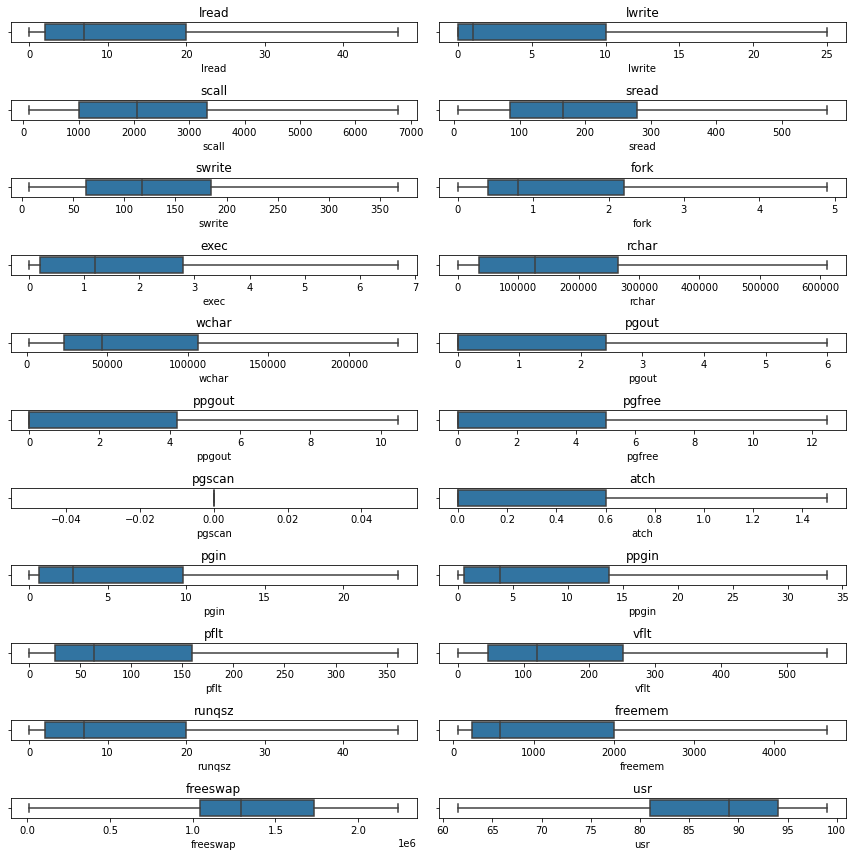

In [271]:
data_plot=comp
fig = plt.figure(figsize=(12, 12))
for i, column in enumerate(data_plot.columns):
    ax = fig.add_subplot(11, 2, i+1)
    sns.boxplot(data_plot[column], ax=ax)
    ax.set_title(column)
plt.tight_layout()
plt.show()

In [272]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# Calculate VIF for each variable in the 'comp' DataFrame
vif_result = calculate_vif(comp)

# Display the VIF results
print(vif_result)


C:\Users\aprad\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


    Variable        VIF
0      lread        inf
1     lwrite   6.423744
2      scall   9.017225
3      sread  18.594655
4     swrite  16.966453
5       fork  25.333287
6       exec   5.955285
7      rchar   4.253690
8      wchar   3.352619
9      pgout  16.205025
10    ppgout  43.013793
11    pgfree  24.106513
12    pgscan        NaN
13      atch   2.750902
14      pgin  23.215304
15     ppgin  23.342616
16      pflt  24.272827
17      vflt  32.809519
18    runqsz        inf
19   freemem   3.428430
20  freeswap  24.692144
21       usr  24.342889


C:\Users\aprad\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [273]:
X = comp.drop('usr',axis=1)
Y = comp.usr
test_size = 0.30
seed = 10
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

pandas.core.frame.DataFrame

In [274]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

test_size = 0.30
seed = 10
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

# Evaluate the model's performance on training data
train_r2 = model.score(X_train, y_train)
train_mae = metrics.mean_absolute_error(y_train, y_train_predict)
train_mse = metrics.mean_squared_error(y_train, y_train_predict)
train_rmse = np.sqrt(train_mse)

# Evaluate the model's performance on testing data
test_r2 = model.score(X_test, y_test)
test_mae = metrics.mean_absolute_error(y_test, y_test_predict)
test_mse = metrics.mean_squared_error(y_test, y_test_predict)
test_rmse = np.sqrt(test_mse)

# Print the evaluation metrics for both training and testing data
print("Training Data - R-squared:", train_r2)
print("Training Data - Mean Absolute Error:", train_mae)
print("Training Data - Mean Squared Error:", train_mse)
print("Training Data - Root Mean Squared Error:", train_rmse)

print("\nTesting Data - R-squared:", test_r2)
print("Testing Data - Mean Absolute Error:", test_mae)
print("Testing Data - Mean Squared Error:", test_mse)
print("Testing Data - Root Mean Squared Error:", test_rmse)


Training Data - R-squared: 0.7821160469525934
Training Data - Mean Absolute Error: 3.2702481960745065
Training Data - Mean Squared Error: 20.416016073903695
Training Data - Root Mean Squared Error: 4.51840857757504

Testing Data - R-squared: 0.7777106377151379
Testing Data - Mean Absolute Error: 3.3977003943872917
Testing Data - Mean Squared Error: 21.792039222216523
Testing Data - Root Mean Squared Error: 4.668194428493368


In [275]:
X = sm.add_constant(X)

# Create the OLS model
model = sm.OLS(Y, X)

# Fit the model to the data
results = model.fit()

# Print the summary of the model
print(results.summary())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     1535.
Date:                Sun, 23 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:58:23   Log-Likelihood:                -24055.
No. Observations:                8192   AIC:                         4.815e+04
Df Residuals:                    8172   BIC:                         4.829e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.7534      0.252    336.772      0.0

# Dataset for Problem 2: Contraceptive_method_dataset.xlsx

In [276]:
contra=pd.read_excel(r'Contraceptive_method_dataset.xlsx')

In [277]:
contra

Wife_age Wife_ education Husband_education  No_of_children_born  \
0         24.0         Primary         Secondary                  3.0   
1         45.0      Uneducated         Secondary                 10.0   
2         43.0         Primary         Secondary                  7.0   
3         42.0       Secondary           Primary                  9.0   
4         36.0       Secondary         Secondary                  8.0   
...        ...             ...               ...                  ...   
1468      33.0        Tertiary          Tertiary                  NaN   
1469      33.0        Tertiary          Tertiary                  NaN   
1470      39.0       Secondary         Secondary                  NaN   
1471      33.0       Secondary         Secondary                  NaN   
1472      17.0       Secondary         Secondary                  1.0   

     Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0      Scientology           No                   2                     High   
1      Scientology           No                   3                Very High   
2      Scientology           No                   3                Very High   
3      Scientology           No                   3                     High   
4      Scientology           No                   3                      Low   
...            ...          ...                 ...                      ...   
1468   Scientology          Yes                   2                Very High   
1469   Scientology           No                   1                Very High   
1470   Scientology          Yes                   1                Very High   
1471   Scientology          Yes                   2                      Low   
1472   Scientology           No                   2                Very High   

     Media_exposure  Contraceptive_method_used  
0            Exposed                        No  
1            Exposed                        No  
2            Exposed                        No  
3            Exposed                        No  
4            Exposed                        No  
...              ...                       ...  
1468         Exposed                       Yes  
1469         Exposed                       Yes  
1470         Exposed                       Yes  
1471         Exposed                       Yes  
1472         Exposed                       Yes  

[1473 rows x 10 columns]

In [278]:
contra.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [279]:
contra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [280]:
contra.describe().T

count       mean       std   min   25%   50%   75%   max
Wife_age             1402.0  32.606277  8.274927  16.0  26.0  32.0  39.0  49.0
No_of_children_born  1452.0   3.254132  2.365212   0.0   1.0   3.0   4.0  16.0
Husband_Occupation   1473.0   2.137814  0.864857   1.0   1.0   2.0   3.0   4.0

In [281]:
contra.dtypes

Wife_age                     float64
Wife_ education               object
Husband_education             object
No_of_children_born          float64
Wife_religion                 object
Wife_Working                  object
Husband_Occupation             int64
Standard_of_living_index      object
Media_exposure                object
Contraceptive_method_used     object
dtype: object

In [282]:
contra.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [283]:
contra['Wife_age']=contra['Wife_age'].fillna(contra['Wife_age'].mean())
contra['No_of_children_born']=contra['No_of_children_born'].fillna(contra['No_of_children_born'].mean())

In [284]:
contra.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [285]:
contra.duplicated().sum()

80

In [286]:
contra_a=contra.drop_duplicates()

In [287]:
contra_a.shape

(1393, 10)

In [288]:
object_columns = contra_a.select_dtypes(include=['object']).columns
for col in object_columns:
    unique_values = contra_a[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")


Unique values in column 'Wife_ education': ['Primary' 'Uneducated' 'Secondary' 'Tertiary']
Unique values in column 'Husband_education': ['Secondary' 'Primary' 'Tertiary' 'Uneducated']
Unique values in column 'Wife_religion': ['Scientology' 'Non-Scientology']
Unique values in column 'Wife_Working': ['No' 'Yes']
Unique values in column 'Standard_of_living_index': ['High' 'Very High' 'Low' 'Very Low']
Unique values in column 'Media_exposure ': ['Exposed' 'Not-Exposed']
Unique values in column 'Contraceptive_method_used': ['No' 'Yes']


# Count of Default and No Default in the Target Column

In [289]:
contra_a['Contraceptive_method_used'].value_counts()

Yes    779
No     614
Name: Contraceptive_method_used, dtype: int64

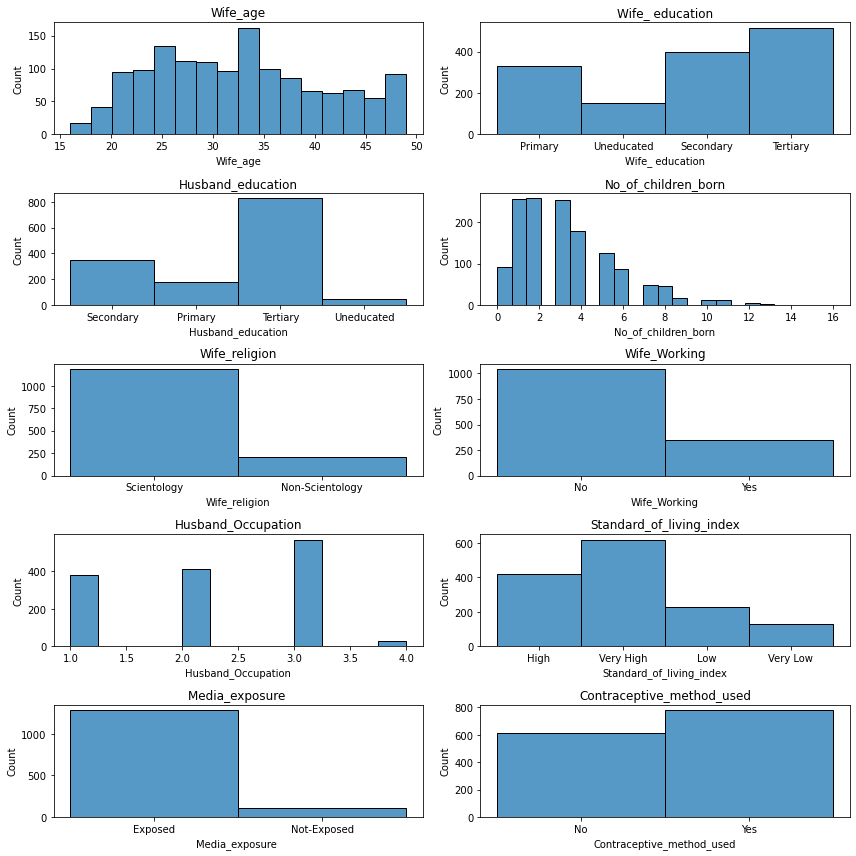

In [290]:
data_plot=contra_a
fig = plt.figure(figsize=(12, 12))
for i, column in enumerate(data_plot.columns):
    ax = fig.add_subplot(5, 2, i+1)
    sns.histplot(data_plot[column], ax=ax)
    ax.set_title(column)
plt.tight_layout()
plt.show()

C:\Users\aprad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aprad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aprad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


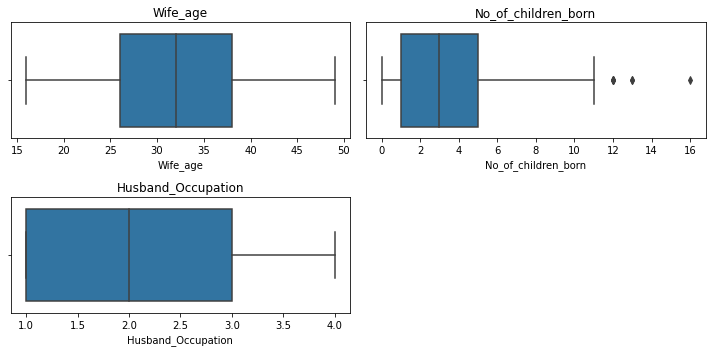

In [291]:
data_plot = contra_a
numeric_columns = data_plot.select_dtypes(include=['int64', 'float64']).columns

num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2
num_cols = min(num_columns, 2)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10,5))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numeric_columns):
    ax = axes[i // 2, i % 2] if num_rows > 1 else axes[i % 2]
    sns.boxplot(data_plot[column], ax=ax)
    ax.set_title(column)
for i in range(num_columns, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


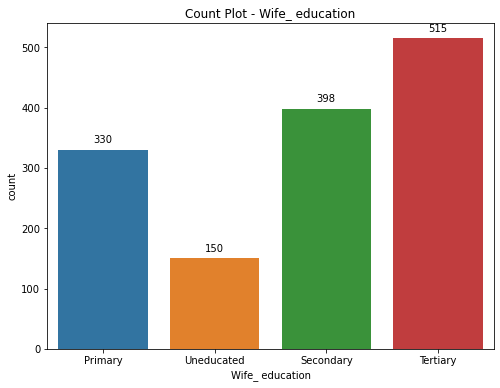

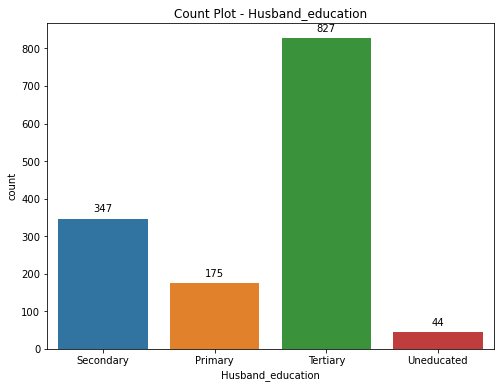

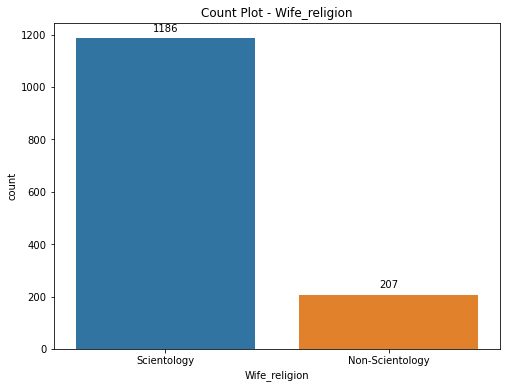

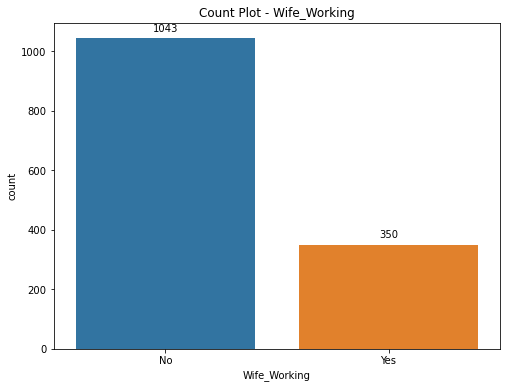

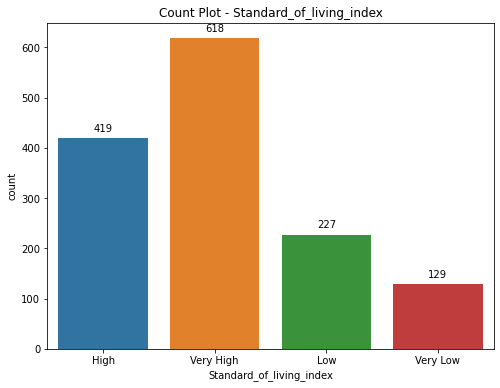

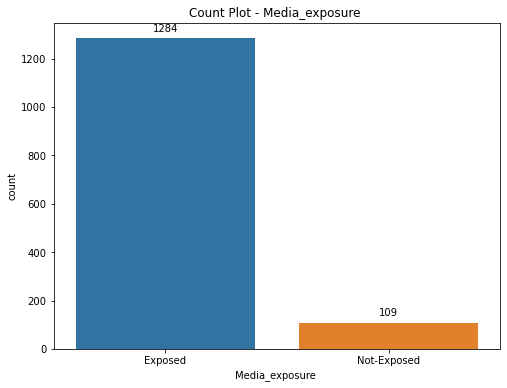

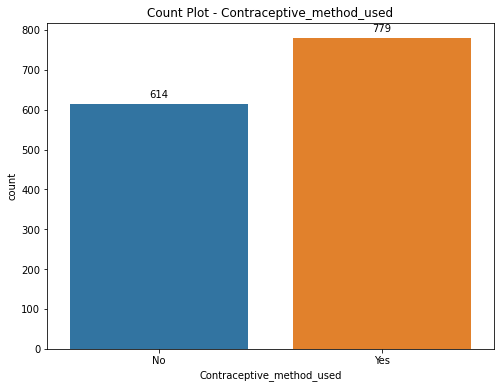

In [292]:
for column in contra_a.select_dtypes(include=['object']):
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=contra_a, x=column)
    plt.title(f"Count Plot - {column}")

    
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10),
                    textcoords='offset points')

    plt.show()

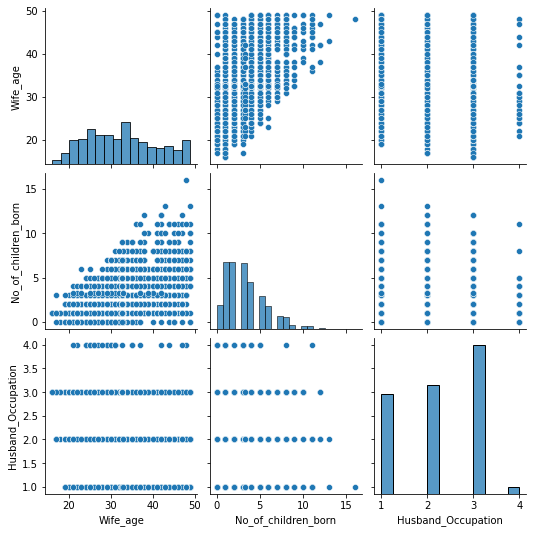

In [293]:
sns.pairplot(contra_a)

<AxesSubplot:>

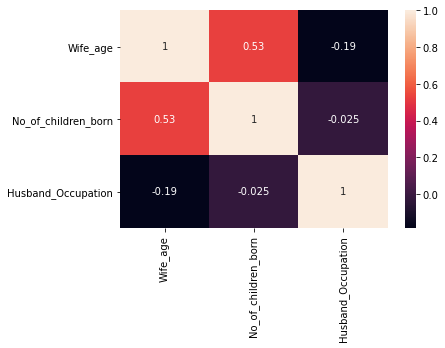

In [294]:
sns.heatmap(contra_a.corr(),annot=True)

In [295]:

contra_a.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

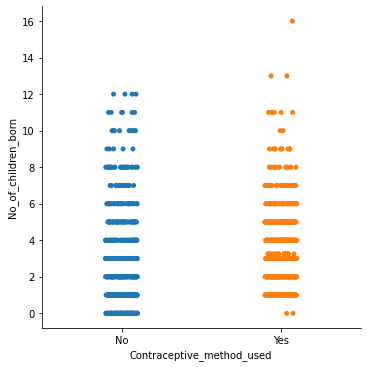

In [296]:
sns.catplot(x='Contraceptive_method_used',y='No_of_children_born',data=contra_a)

In [297]:
contra_a['Wife_ education'].unique()

array(['Primary', 'Uneducated', 'Secondary', 'Tertiary'], dtype=object)

In [298]:
contra_a['Wife_ education']=np.where(contra_a['Wife_ education'] =='Uneducated', 1, contra_a['Wife_ education'])
contra_a['Wife_ education']=np.where(contra_a['Wife_ education'] =='Primary', 2, contra_a['Wife_ education'])
contra_a['Wife_ education']=np.where(contra_a['Wife_ education'] =='Secondary', 3, contra_a['Wife_ education'])
contra_a['Wife_ education']=np.where(contra_a['Wife_ education'] =='Tertiary', 4, contra_a['Wife_ education'])

<ipython-input-298-debf1dfe0d80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_a['Wife_ education']=np.where(contra_a['Wife_ education'] =='Uneducated', 1, contra_a['Wife_ education'])
<ipython-input-298-debf1dfe0d80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_a['Wife_ education']=np.where(contra_a['Wife_ education'] =='Primary', 2, contra_a['Wife_ education'])
<ipython-input-298-debf1dfe0d80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [299]:
contra_a['Husband_education'].unique()

array(['Secondary', 'Primary', 'Tertiary', 'Uneducated'], dtype=object)

In [300]:
contra_a['Husband_education']=np.where(contra_a['Husband_education'] =='Uneducated', 1, contra_a['Husband_education'])
contra_a['Husband_education']=np.where(contra_a['Husband_education'] =='Primary', 2, contra_a['Husband_education'])
contra_a['Husband_education']=np.where(contra_a['Husband_education'] =='Secondary', 3, contra_a['Husband_education'])
contra_a['Husband_education']=np.where(contra_a['Husband_education'] =='Tertiary', 4, contra_a['Husband_education'])

<ipython-input-300-b22ce05ef195>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_a['Husband_education']=np.where(contra_a['Husband_education'] =='Uneducated', 1, contra_a['Husband_education'])
<ipython-input-300-b22ce05ef195>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_a['Husband_education']=np.where(contra_a['Husband_education'] =='Primary', 2, contra_a['Husband_education'])
<ipython-input-300-b22ce05ef195>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [301]:
contra_a['Wife_religion'].unique()

array(['Scientology', 'Non-Scientology'], dtype=object)

In [302]:
contra_a['Standard_of_living_index'].unique()

array(['High', 'Very High', 'Low', 'Very Low'], dtype=object)

In [303]:
contra_a['Standard_of_living_index']=np.where(contra_a['Standard_of_living_index'] =='Very Low', 1, contra_a['Standard_of_living_index'])
contra_a['Standard_of_living_index']=np.where(contra_a['Standard_of_living_index'] =='Low', 2, contra_a['Standard_of_living_index'])
contra_a['Standard_of_living_index']=np.where(contra_a['Standard_of_living_index'] =='High', 3, contra_a['Standard_of_living_index'])
contra_a['Standard_of_living_index']=np.where(contra_a['Standard_of_living_index'] =='Very High', 4, contra_a['Standard_of_living_index'])

<ipython-input-303-7e5614aaa153>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_a['Standard_of_living_index']=np.where(contra_a['Standard_of_living_index'] =='Very Low', 1, contra_a['Standard_of_living_index'])
<ipython-input-303-7e5614aaa153>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_a['Standard_of_living_index']=np.where(contra_a['Standard_of_living_index'] =='Low', 2, contra_a['Standard_of_living_index'])
<ipython-input-303-7e5614aaa153>:3: SettingWithCopyWarning: 
A value is tryin

In [304]:
contra_a['Wife_religion']=np.where(contra_a['Wife_religion'] =='Scientology', 1, contra_a['Wife_religion'])
contra_a['Wife_religion']=np.where(contra_a['Wife_religion'] =='Non-Scientology', 2, contra_a['Wife_religion'])

<ipython-input-304-bd3e17cc4777>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_a['Wife_religion']=np.where(contra_a['Wife_religion'] =='Scientology', 1, contra_a['Wife_religion'])
<ipython-input-304-bd3e17cc4777>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_a['Wife_religion']=np.where(contra_a['Wife_religion'] =='Non-Scientology', 2, contra_a['Wife_religion'])


In [305]:
contra_a['Wife_Working']=np.where(contra_a['Wife_Working'] =='Yes', 1, contra_a['Wife_Working'])
contra_a['Wife_Working']=np.where(contra_a['Wife_Working'] =='No', 2, contra_a['Wife_Working'])

<ipython-input-305-919f2e6f3bef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_a['Wife_Working']=np.where(contra_a['Wife_Working'] =='Yes', 1, contra_a['Wife_Working'])
<ipython-input-305-919f2e6f3bef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_a['Wife_Working']=np.where(contra_a['Wife_Working'] =='No', 2, contra_a['Wife_Working'])


In [306]:
contra_a['Media_exposure '].unique()

array(['Exposed', 'Not-Exposed'], dtype=object)

In [307]:
contra_a.loc[contra_a['Media_exposure '] == 'Exposed', 'Media_exposure '] = 1
contra_a.loc[contra_a['Media_exposure '] == 'Not-Exposed', 'Media_exposure '] = 2

contra_a.loc[contra_a['Contraceptive_method_used'] == 'Yes', 'Contraceptive_method_used'] = 1
contra_a.loc[contra_a['Contraceptive_method_used'] == 'No', 'Contraceptive_method_used'] = 2

C:\Users\aprad\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [308]:
contra_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 152.0+ KB


In [309]:
contra_a

Wife_age Wife_ education Husband_education  No_of_children_born  \
0         24.0               2                 3             3.000000   
1         45.0               1                 3            10.000000   
2         43.0               2                 3             7.000000   
3         42.0               3                 2             9.000000   
4         36.0               3                 3             8.000000   
...        ...             ...               ...                  ...   
1468      33.0               4                 4             3.254132   
1469      33.0               4                 4             3.254132   
1470      39.0               3                 3             3.254132   
1471      33.0               3                 3             3.254132   
1472      17.0               3                 3             1.000000   

     Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0                1            2                   2                        3   
1                1            2                   3                        4   
2                1            2                   3                        4   
3                1            2                   3                        3   
4                1            2                   3                        2   
...            ...          ...                 ...                      ...   
1468             1            1                   2                        4   
1469             1            2                   1                        4   
1470             1            1                   1                        4   
1471             1            1                   2                        2   
1472             1            2                   2                        4   

     Media_exposure  Contraceptive_method_used  
0                  1                         2  
1                  1                         2  
2                  1                         2  
3                  1                         2  
4                  1                         2  
...              ...                       ...  
1468               1                         1  
1469               1                         1  
1470               1                         1  
1471               1                         1  
1472               1                         1  

[1393 rows x 10 columns]

In [310]:
object_columns = contra_a.select_dtypes(include=['object']).columns
contra_a[object_columns] = contra_a[object_columns].astype('int64')

C:\Users\aprad\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [311]:
contra_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   int64  
 2   Husband_education          1393 non-null   int64  
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   int64  
 5   Wife_Working               1393 non-null   int64  
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   int64  
 8   Media_exposure             1393 non-null   int64  
 9   Contraceptive_method_used  1393 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 152.0 KB


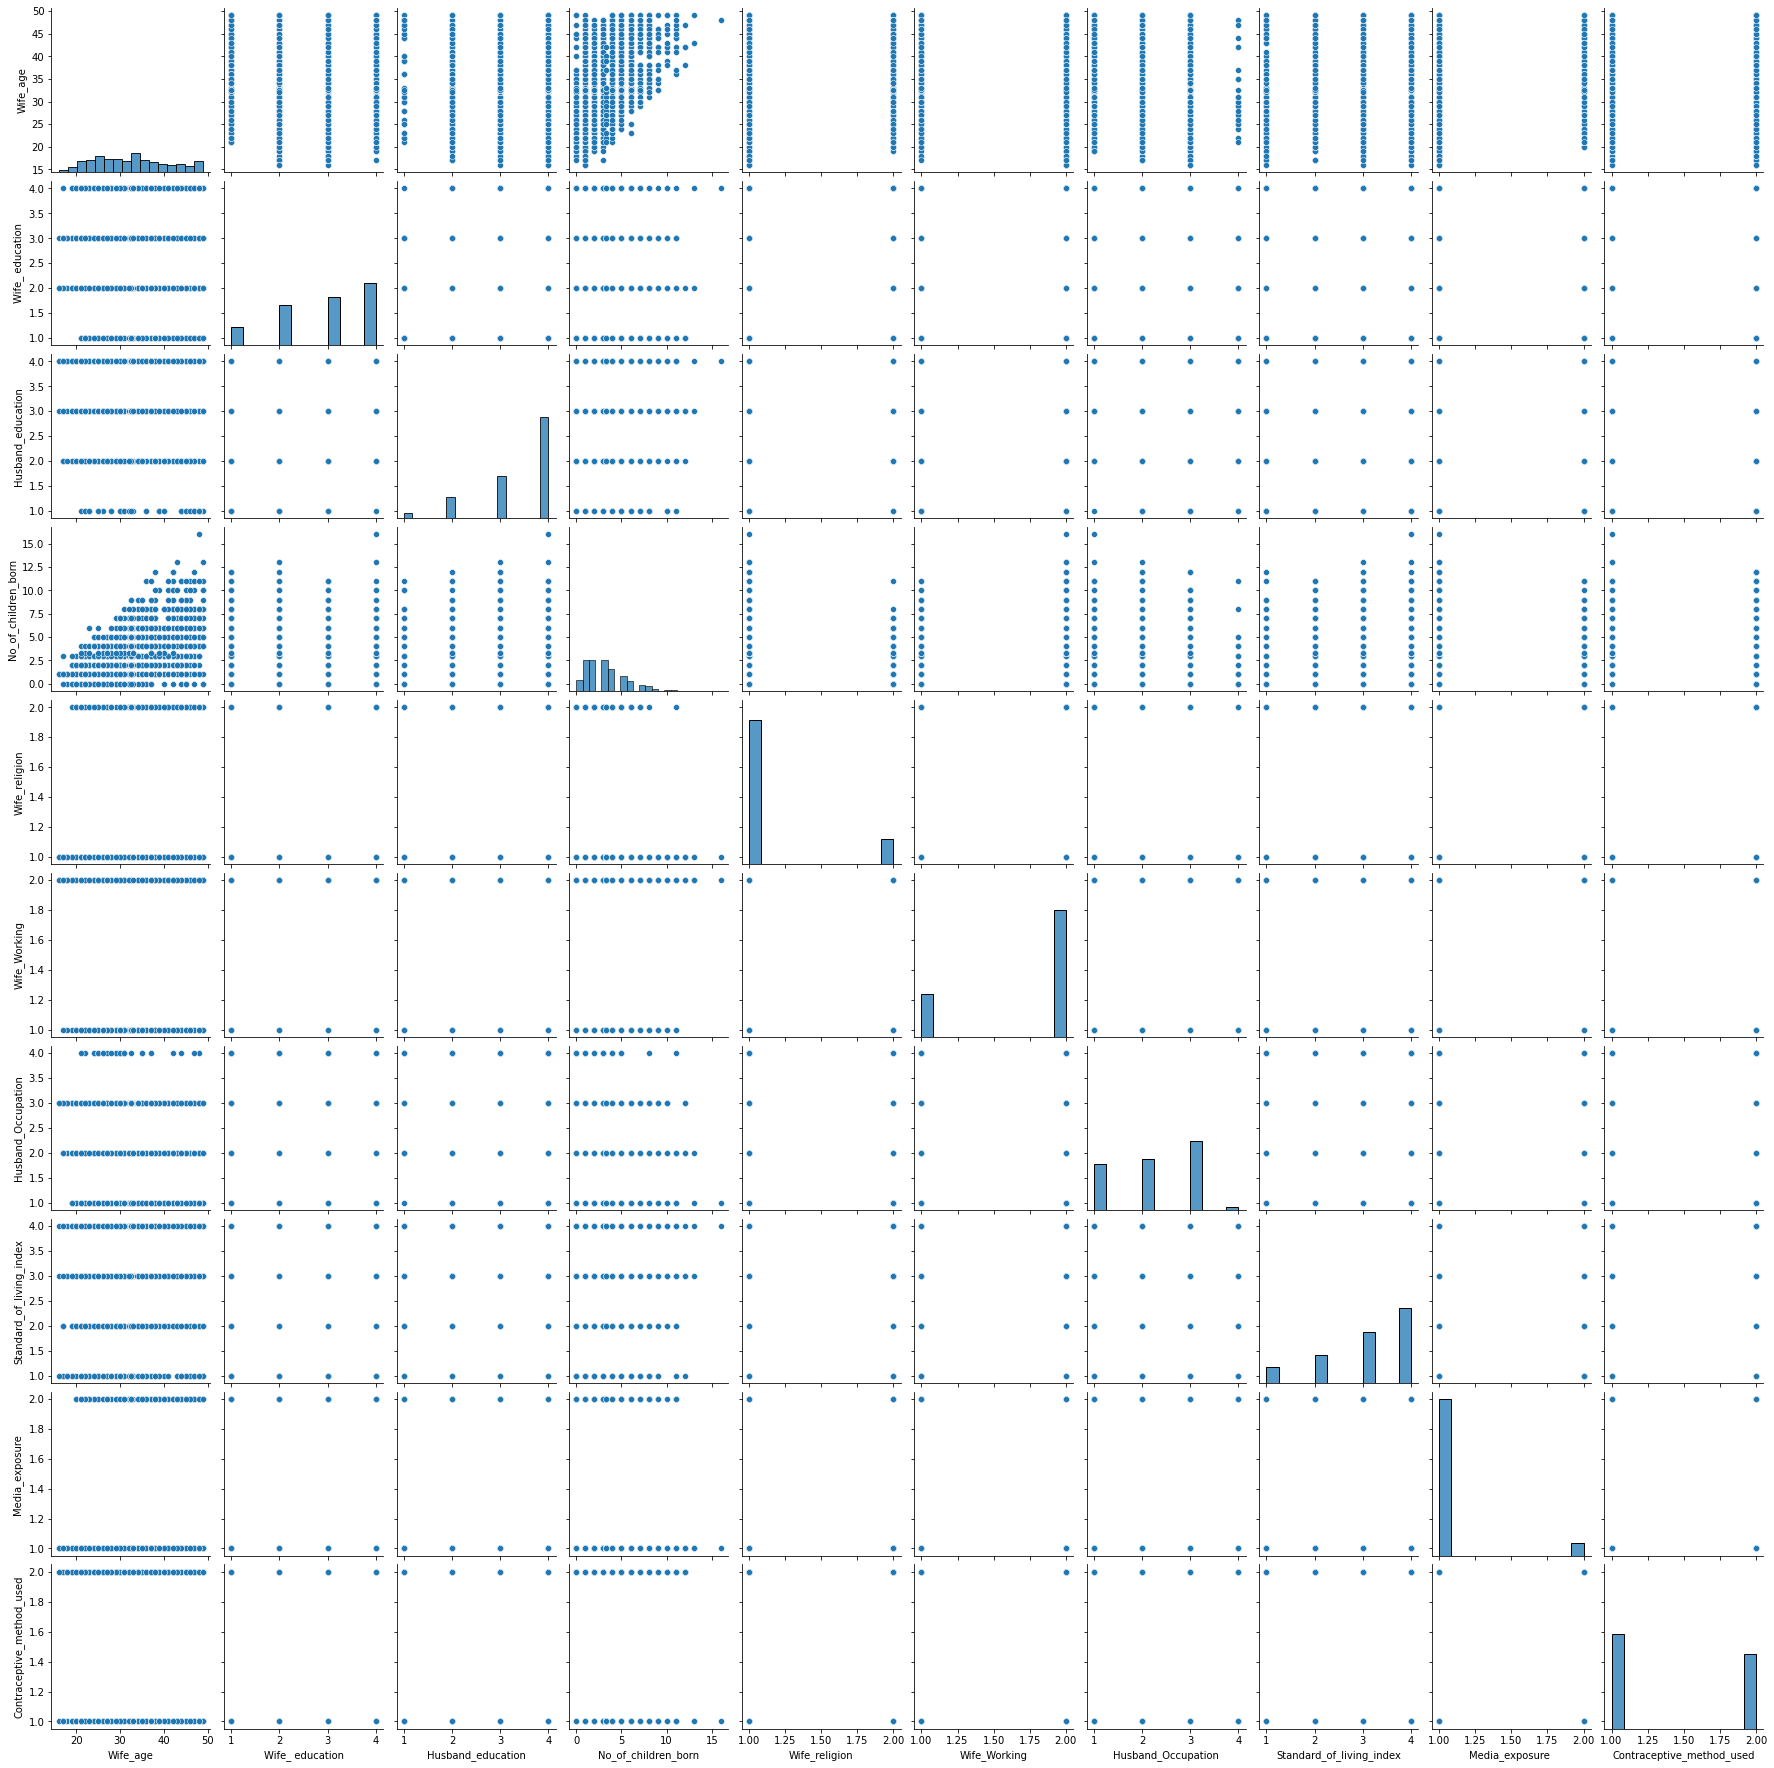

In [312]:
sns.pairplot(contra_a)

<AxesSubplot:>

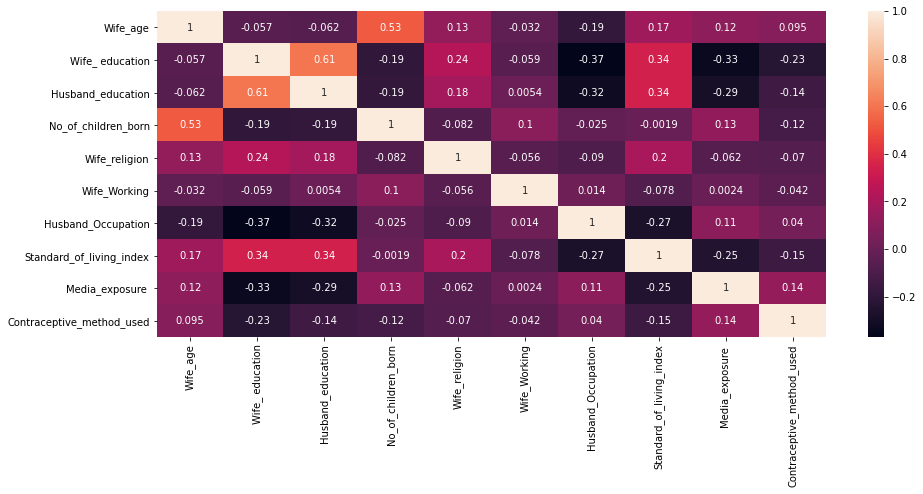

In [313]:
plt.figure(figsize=(15, 6))
sns.heatmap(contra_a.corr(),annot=True)

In [314]:
scaler=StandardScaler()
X = scaler.fit_transform(contra_a.drop(['Contraceptive_method_used'],axis=1))
Y = contra_a['Contraceptive_method_used']

In [315]:
Y.value_counts()

1    779
2    614
Name: Contraceptive_method_used, dtype: int64

In [316]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X,Y)
model

LinearDiscriminantAnalysis()

In [317]:
pred_class = model.predict(X)
contra_a['Prediction'] = pred_class 

<ipython-input-317-e83d182fe6de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_a['Prediction'] = pred_class


In [318]:
confusion_matrix(Y, pred_class)

array([[629, 150],
       [315, 299]], dtype=int64)

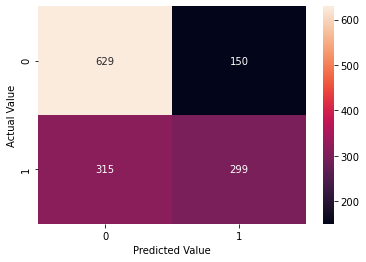

In [319]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(Y, pred_class),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

In [320]:
from sklearn.metrics import classification_report
print(classification_report(Y, pred_class))

              precision    recall  f1-score   support

           1       0.67      0.81      0.73       779
           2       0.67      0.49      0.56       614

    accuracy                           0.67      1393
   macro avg       0.67      0.65      0.65      1393
weighted avg       0.67      0.67      0.66      1393



In [321]:
X.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, Y, test_size=.30, random_state=1)

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)


In [ ]:
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [ ]:
dt_model.fit(X_train, train_labels)

In [322]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ContraTree_File = open(r"C_tree.dot","w")
dot_data=tree.export_graphviz(dt_model,out_file=ContraTree_File,feature_names=list(X_train), class_names=train_labels)
Tree_File.close()

ValueError: Length of feature_names, 21 does not match number of features, 9